In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('adult.csv')

In [3]:
data.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
data.tail()

,Name,Age,Income
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [6]:
data.shape

(22, 3)

In [7]:
data.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


<AxesSubplot:>

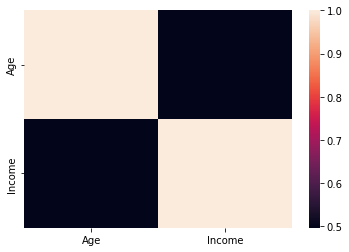

In [8]:
sns.heatmap(data.corr())

#### Encoding the categorical data 

In [9]:
encode=LabelEncoder()


In [10]:
data['Name']=encode.fit_transform(data['Name'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

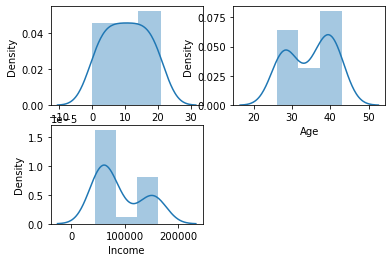

In [19]:
# Plotting
plot_number=1
for columns in data:
    if plot_number<=3:
        plt.subplot(2,2,plot_number)
        sns.distplot(data[columns])
    plot_number+=1
plt.show()    
    

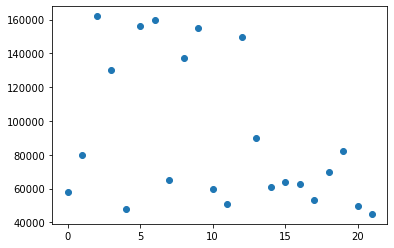

In [40]:
plt.scatter(data['Name'],data['Income'])

In [17]:
data.columns


Index(['Name', 'Age', 'Income'], dtype='object')

In [18]:
X=data[['Age']]
y=data['Income']

In [19]:
# Kmeans 
k=KMeans(n_clusters=3)

In [20]:
k.fit(X,y)

KMeans(n_clusters=3)

In [21]:
prediction=k.fit_predict(data[['Age','Income']])
prediction

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [22]:
# Creating new column names cluster 
data['cluster']=prediction

In [23]:
data

,Name,Age,Income,cluster
0,18,27,70000,2
1,13,29,90000,2
2,14,29,61000,1
3,10,28,60000,1
4,12,42,150000,0
5,9,39,155000,0
6,6,41,160000,0
7,2,38,162000,0
8,5,36,156000,0
9,3,35,130000,0


In [27]:
# Cluster centres
k.cluster_centers_[:]

array([150000.        ,  56136.36363636,  80500.        ])

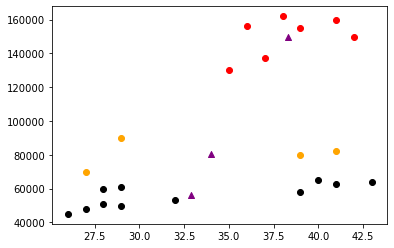

In [39]:
# Plotting against the clusters
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
plt.scatter(df1['Age'],df1['Income'],color='red')
plt.scatter(df2['Age'],df2['Income'],color='black')
plt.scatter(df3['Age'],df3['Income'],color='orange')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='purple',marker='^',label='centroid')

In [67]:
# Elbow method
sum_square_error=[]
k_range=range(1,10)
for k in k_range:
    k=KMeans(n_clusters=k)
    k.fit(data[['Age','Income']])
    sum_square_error.append(k.inertia_)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


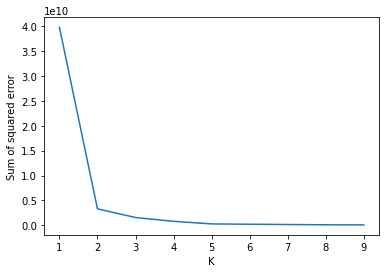

In [68]:
# Plotting the sum of squared error vs K
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sum_square_error)